In [2]:
from dacota import process_cohortization, get_cohort

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston


dict_data = load_boston()
df = pd.DataFrame(data = dict_data["data"], columns=dict_data["feature_names"])
df["target"] = dict_data["target"]
del(dict_data)

categorical_cols = [ "RAD", 'CHAS']
continous_cols = ['ZN', 'INDUS', 'TAX',  'CRIM', 'AGE', 'NOX', 'DIS', 'PTRATIO', 'LSTAT', ]
target_col = "target"
task = "regression"
all_columns = list(set.union(set(categorical_cols),set(continous_cols),set([target_col])))


df = df[all_columns]

In [11]:
 df_cohorts, df_generations = process_cohortization(df,
                target_col,
                categorical_cols, 
                continous_cols,
                task,
                minimum_confidence_for_a_cohort = 0.98, 
                minimum_population_for_a_cohort = 25,
                maximum_population_for_a_cohort = 100,
                no_permutations = 100,
                no_initial_population_size = 2000,
                no_generations= 20,
                no_random_additions_per_generation = 1000,
                no_mutations_per_generation = 1000,
                no_crossovers_per_generation = 1000,
                top_quantile_to_survive_per_generation = 0.5,
                no_bins_discretization_continous = 5,
                treat_nans_as_category = True,
                target_nan_strategy = "mean",
                )


generation : 0 // population_size : 1501 // duration (seconds) : 1 // mean_fitness : 0.007156691323044175 // max_fitness : 10.742193675889308 //
generation : 1 // population_size : 1251 // duration (seconds) : 1 // mean_fitness : 0.030939969802966406 // max_fitness : 11.443617134921508 //
generation : 2 // population_size : 1126 // duration (seconds) : 1 // mean_fitness : 0.034374691139885415 // max_fitness : 11.443617134921508 //
generation : 3 // population_size : 1064 // duration (seconds) : 1 // mean_fitness : 0.0445310303006855 // max_fitness : 11.443617134921508 //
generation : 4 // population_size : 1033 // duration (seconds) : 1 // mean_fitness : 0.0458673922942201 // max_fitness : 11.443617134921508 //
generation : 5 // population_size : 1017 // duration (seconds) : 1 // mean_fitness : 0.05373953616354551 // max_fitness : 11.443617134921508 //
generation : 6 // population_size : 1009 // duration (seconds) : 1 // mean_fitness : 0.07638233393953661 // max_fitness : 13.2078063241

In [12]:
df_cohorts

,solution_form,fitness,size_cohort,confidence,generation
0,"[[RAD, 1.0], [RAD, 3.0], [RAD, 4.0], [RAD, 8.0...",13.207806,28,1.00,7
1,"[[RAD, 8.0], [RAD, 7.0], [RAD, 24.0], [CHAS, 0...",12.622280,38,1.00,9
2,"[[RAD, 1.0], [RAD, 2.0], [RAD, 3.0], [RAD, 5.0...",12.475231,33,1.00,19
3,"[[RAD, 3.0], [RAD, 4.0], [RAD, 7.0], [RAD, 24....",11.775663,42,1.00,13
4,"[[RAD, 2.0], [RAD, 3.0], [RAD, 6.0], [RAD, 7.0...",11.745572,47,1.00,10
5,"[[RAD, 2.0], [RAD, 4.0], [RAD, 6.0], [RAD, 7.0...",11.443617,37,1.00,2
6,"[[RAD, 2.0], [RAD, 3.0], [RAD, 4.0], [RAD, 8.0...",11.204681,32,1.00,17
7,"[[RAD, 2.0], [RAD, 5.0], [RAD, 6.0], [RAD, 24....",10.908362,45,1.00,16
8,"[[RAD, 5.0], [RAD, 4.0], [RAD, 8.0], [RAD, 7.0...",10.742194,28,1.00,0
9,"[[RAD, 2.0], [RAD, 5.0], [RAD, 4.0], [RAD, 6.0...",10.710418,67,1.00,8


In [13]:
df_generations

,generation,population_size,mean_fitness,max_fitness,median_fitness,valid_solutions_ratio,computation_duration_in_seconds
0,0,1501,0.007157,10.742194,0.0,0.000666,1
1,1,1251,0.030940,11.443617,0.0,0.003197,1
2,2,1126,0.034375,11.443617,0.0,0.003552,1
3,3,1064,0.044531,11.443617,0.0,0.004699,1
4,4,1033,0.045867,11.443617,0.0,0.004840,1
5,5,1017,0.053740,11.443617,0.0,0.005900,1
6,6,1009,0.076382,13.207806,0.0,0.007929,1
7,7,1005,0.087343,13.207806,0.0,0.008955,1
8,8,1003,0.100102,13.207806,0.0,0.009970,1
9,9,1002,0.128309,13.207806,0.0,0.012974,1


In [14]:


cohort_ind_ = 0
solution_form =df_cohorts.iloc[cohort_ind_].solution_form

df_cohorts.iloc[cohort_ind_]

solution_form    [[RAD, 1.0], [RAD, 3.0], [RAD, 4.0], [RAD, 8.0...
fitness                                                  13.207806
size_cohort                                                     28
confidence                                                     1.0
generation                                                       7
Name: 0, dtype: object

In [15]:
df_cohort_out_ = get_cohort(df, solution_form, continous_cols)
df_cohort_out_[target_col].mean(), df[target_col].mean(), len(df_cohort_out_), abs(df_cohort_out_[target_col].mean() -  df[target_col].mean())

(9.623333333333333, 22.532806324110698, 30, 12.909472990777365)

In [16]:
df_cohort_out_

,CRIM,RAD,TAX,ZN,PTRATIO,INDUS,DIS,target,LSTAT,AGE,NOX,CHAS
385,16.81180,24.0,666.0,0.0,20.2,18.1,1.4261,7.2,30.81,98.1,0.700,0.0
386,24.39380,24.0,666.0,0.0,20.2,18.1,1.4672,10.5,28.28,100.0,0.700,0.0
388,14.33370,24.0,666.0,0.0,20.2,18.1,1.5895,10.2,30.62,100.0,0.700,0.0
389,8.15174,24.0,666.0,0.0,20.2,18.1,1.7281,11.5,20.85,98.9,0.700,0.0
392,11.57790,24.0,666.0,0.0,20.2,18.1,1.7700,9.7,25.68,97.0,0.700,0.0
396,5.87205,24.0,666.0,0.0,20.2,18.1,1.6768,12.5,19.37,96.0,0.693,0.0
397,7.67202,24.0,666.0,0.0,20.2,18.1,1.6334,8.5,19.92,98.9,0.693,0.0
398,38.35180,24.0,666.0,0.0,20.2,18.1,1.4896,5.0,30.59,100.0,0.693,0.0
399,9.91655,24.0,666.0,0.0,20.2,18.1,1.5004,6.3,29.97,77.8,0.693,0.0
400,25.04610,24.0,666.0,0.0,20.2,18.1,1.5888,5.6,26.77,100.0,0.693,0.0


In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston


dict_data = load_boston()
df = pd.DataFrame(data = dict_data["data"], columns=dict_data["feature_names"])
df["target"] = dict_data["target"]
del(dict_data)

categorical_cols = [ "CHAS", 'target']
continous_cols = ['ZN', 'INDUS', 'TAX',  'CRIM', 'AGE', 'NOX', 'DIS', 'PTRATIO', 'LSTAT', ]
target_col = "RAD"
task = "classification"
all_columns = list(set.union(set(categorical_cols),set(continous_cols),set([target_col])))


df = df[all_columns]

In [18]:
 df_cohorts, df_generations = process_cohortization(df,
                target_col,
                categorical_cols, 
                continous_cols,
                task,
                minimum_confidence_for_a_cohort = 0.98, 
                minimum_population_for_a_cohort = 5,
                maximum_population_for_a_cohort = 50,
                no_permutations = 100,
                no_initial_population_size = 2000,
                no_generations= 20,
                no_random_additions_per_generation = 1000,
                no_mutations_per_generation = 1000,
                no_crossovers_per_generation = 1000,
                top_quantile_to_survive_per_generation = 0.5,
                no_bins_discretization_continous = 5,
                treat_nans_as_category = True,
                target_nan_strategy = None,
                )


generation : 0 // population_size : 1501 // duration (seconds) : 7 // mean_fitness : 0.0012840403135121737 // max_fitness : 0.09991542504801504 //
generation : 1 // population_size : 1251 // duration (seconds) : 7 // mean_fitness : 0.002218358791608706 // max_fitness : 0.09991542504801504 //
generation : 2 // population_size : 1126 // duration (seconds) : 4 // mean_fitness : 0.002819686449295465 // max_fitness : 0.09991542504801504 //
generation : 3 // population_size : 1064 // duration (seconds) : 4 // mean_fitness : 0.003683327136070286 // max_fitness : 0.10930291218659713 //
generation : 4 // population_size : 1033 // duration (seconds) : 4 // mean_fitness : 0.004214945830193958 // max_fitness : 0.10930291218659713 //
generation : 5 // population_size : 1017 // duration (seconds) : 4 // mean_fitness : 0.004968420801079271 // max_fitness : 0.10930291218659713 //
generation : 6 // population_size : 1009 // duration (seconds) : 4 // mean_fitness : 0.00583172109149535 // max_fitness : 0

In [19]:

cohort_ind_ = 0
solution_form =df_cohorts.iloc[cohort_ind_].solution_form

df_cohorts.iloc[cohort_ind_]

solution_form    [[CHAS, 0.0], [target, 21.6], [target, 34.7], ...
fitness                                                    0.12156
size_cohort                                                      5
confidence                                                     1.0
generation                                                      14
Name: 0, dtype: object

In [20]:
df_cohort_out_ = get_cohort(df, solution_form, continous_cols)


In [21]:
df_cohort_out_

,CRIM,TAX,RAD,ZN,PTRATIO,INDUS,DIS,target,LSTAT,AGE,NOX,CHAS
1,0.02731,242.0,2.0,0.0,17.8,7.07,4.9671,21.6,9.14,78.9,0.469,0.0
37,0.08014,279.0,5.0,0.0,19.2,5.96,3.9342,21.0,8.77,41.5,0.499,0.0
328,0.06617,430.0,4.0,0.0,16.9,3.24,5.2146,19.3,9.97,25.8,0.460,0.0
329,0.06724,430.0,4.0,0.0,16.9,3.24,5.2146,22.6,7.34,17.2,0.460,0.0
84,0.05059,247.0,3.0,0.0,18.5,4.49,4.7794,23.9,9.62,48.0,0.449,0.0


<AxesSubplot:>

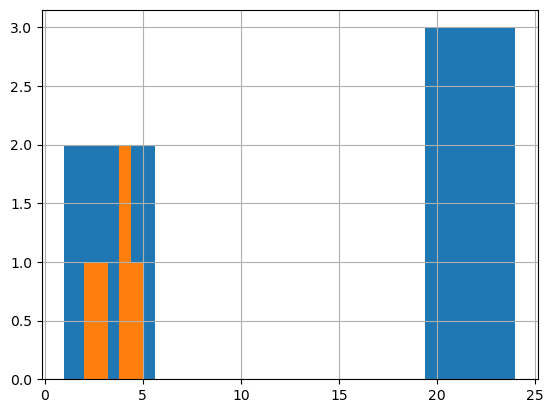

In [22]:
df.sample(len(df_cohort_out_))[target_col].hist(bins=len(df_cohort_out_))
df_cohort_out_[target_col].hist(bins=len(df_cohort_out_))